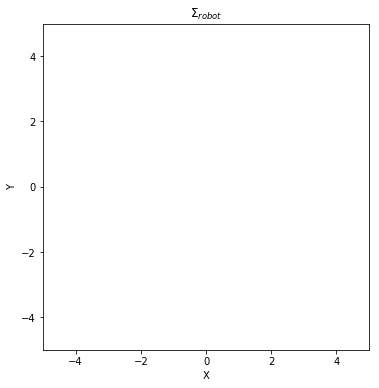

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

class World():
    def __init__(self,objects=[]):
        self.objects = objects
        
    def append(self,obj):
        self.objects.append(obj)
    
    def draw(self):
        plt.figure(figsize=(6,6))
        plt.axes().set_aspect('equal')
        plt.xlim(-5,5)
        plt.ylim(-5,5)
        plt.title("$\Sigma_{robot}$")
        plt.xlabel("X")
        plt.ylabel("Y")
        
        for obj in self.objects: obj.draw() 
        
world = World()
world.draw()

In [2]:
import math, random
import numpy as np
import matplotlib.patches as patches

class Robot():
    def __init__(self, pose, rot_noise_ratio, fw_noise_ratio, color="black"):
        self.pose = pose
        self.rot_noise_ratio = rot_noise_ratio
        self.fw_noise_ratio = fw_noise_ratio
        self.r = 0.5
        self.color = color
        
    def draw(self):
        x, y, theta = self.pose
        xn = x + self.r * math.cos(theta)
        yn = y + self.r * math.sin(theta)
        plt.plot([x,xn], [y,yn], color=self.color)
        
        c = patches.Circle(xy=(x, y), radius=self.r, fill=False, color=self.color)
        plt.gca().add_patch(c)
        
    def motion_model_discrete(self, pose, rot, fw):
        x, y, theta = pose
        actual_rot = random.gauss(rot, rot*self.rot_noise_ratio)
        actual_fw = random.gauss(fw, fw*self.fw_noise_ratio)
        
        theta += actual_rot
        x += actual_fw * math.cos(theta)
        y += actual_fw * math.sin(theta)
        
        return np.array([x,y,theta]).T
    
    def motion_discrete(self, rot, fw):
        self.pose = self.motion_model_discrete(self.pose, rot, fw)

In [3]:
class Logger():
    def __init__(self,color="red"):
        self.poses = []
        self.color = color
        
    def append(self,pose):
        self.poses.append(pose)
        
    def draw(self):
        xs = [p[0] for p in self.poses]
        ys = [p[1] for p in self.poses]
        cs = [math.cos(p[2]) for p in self.poses]
        ss = [math.sin(p[2]) for p in self.poses]
        
        plt.quiver(xs, ys, cs, ss,color=self.color)

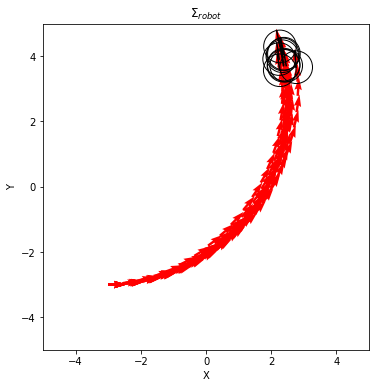

In [4]:
world = World()

for i in range(10):
    robot = Robot(np.array([-3,-3,0]).T,0.1,0.1)
    world.append(robot)

    logger = Logger()
    logger.append(robot.pose)
    world.append(logger)

    for i in range(20):
        robot.motion_discrete(math.pi/36, 0.5)
        logger.append(robot.pose)

world.draw()